In [1]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False  # 마이너스 표시 해결
# 한글설정
matplotlib.rcParams['font.family'] = 'Malgun Gothic' # windows 사용자
# matplotlib.rcParams['font.family'] = 'AppleGothic Gothic' # Mac사용자
matplotlib.rcParams['font.size'] = '10' # 글자크기

In [2]:
# python 버전을 꼭 확인
model = keras.models.load_model('cnn_model.keras')

In [3]:
model.layers

[<Conv2D name=conv2d, built=True>,
 <MaxPooling2D name=max_pooling2d, built=True>,
 <Conv2D name=conv2d_1, built=True>,
 <MaxPooling2D name=max_pooling2d_1, built=True>,
 <Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <Dropout name=dropout, built=True>,
 <Dense name=dense_1, built=True>]

In [7]:
# 0번째 input
model.layers[0].input

<KerasTensor shape=(None, 28, 28, 1), dtype=float32, sparse=False, name=input_layer>

In [8]:
# 0번째 output
model.layers[0].output

<KerasTensor shape=(None, 28, 28, 32), dtype=float32, sparse=False, name=keras_tensor>

In [11]:
model.layers

[<Conv2D name=conv2d, built=True>,
 <MaxPooling2D name=max_pooling2d, built=True>,
 <Conv2D name=conv2d_1, built=True>,
 <MaxPooling2D name=max_pooling2d_1, built=True>,
 <Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <Dropout name=dropout, built=True>,
 <Dense name=dense_1, built=True>]

In [9]:
# keras.models.Model 넣어서 결과를 봄.
# 모델을 새롭게 구성
conv_acti = keras.models.Model(model.layers[0].input,model.layers[0].output)

In [ ]:
# 데이터를 1개 뽑아서, 위 model에 넣어서 확인

In [10]:
(train_input,train_target),(test_input,test_target) = keras.datasets.fashion_mnist.load_data()

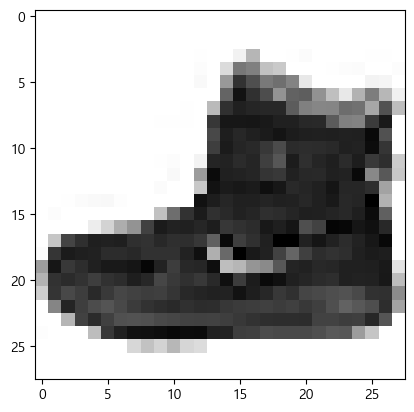

In [12]:
# train_input[0] 확인
plt.imshow(train_input[0],cmap='gray_r')
plt.show()

In [13]:
# train_input[0] 데이터를 위 model를 가지고 예측
# 2차원행렬 -> 3차원행렬 변경 / 255
inputs = train_input[0:1].reshape(-1,28,28,1)/255

# 1개를 예측, 임시 model(conv_acti)에서 predict
feature_maps = conv_acti.predict(inputs) #conv2D모델만 존재

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


In [15]:
# 32개 필터의 활성화 맵이 구성됨.
print(feature_maps.shape)

(1, 28, 28, 32)


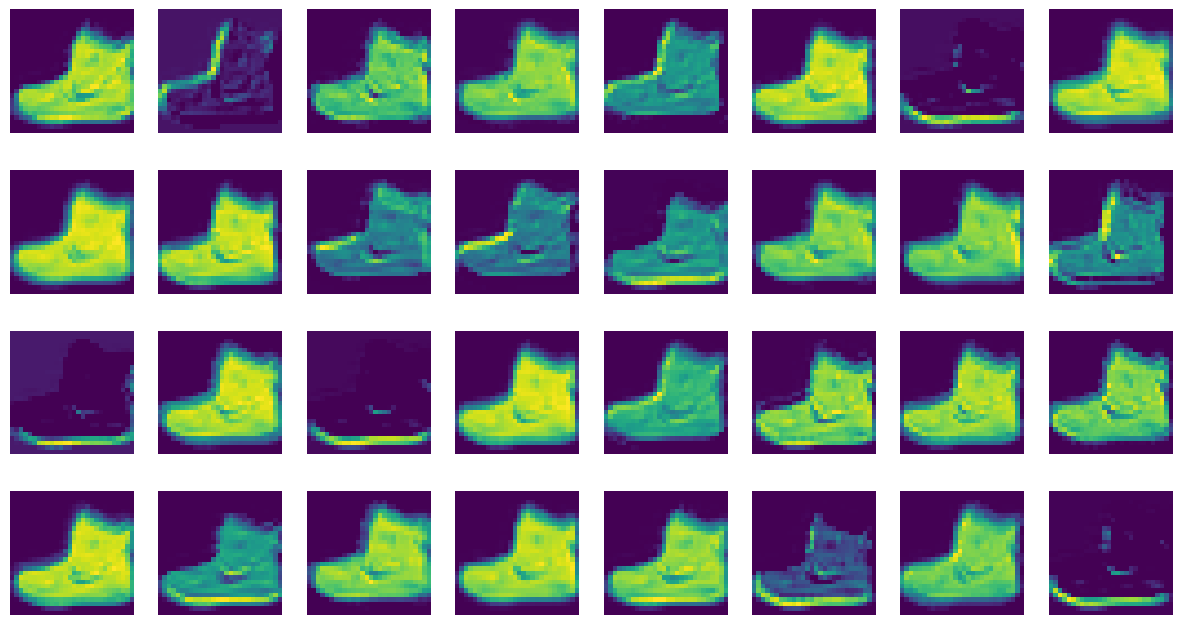

In [17]:
# 그래프 출력 - 활성화맵(가중치 결과) 32장의 이미지출력
fig, axs = plt.subplots(4,8,figsize=(15,8))
for i in range(4):
    for j in range(8):
        # [0,0],[0,1],[0,2].....[1,7]
        axs[i,j].imshow(feature_maps[0,:,:,i*8+j]) # 0,1,2,3....31
        axs[i,j].axis('off')

plt.show()        